<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r15_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r15-good.csv?token=AKVFSOGFGEBE663ATEGIEMS6X3UHG"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r15-mal.csv?token=AKVFSOAOWEN2A5ONZQ6RT3C6X3UE4"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

Characteristics of Dataset

In [333]:
dfg

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,991,3,4,3,1,4,3,9,29,13,27,11,9,3,2,0.666667,15,1,1,1,1,1,12,3,12,108,9,27,27,1
1,2310,3,4,3,1,4,3,9,29,13,27,11,22,3,2,0.666667,12,1,1,1,1,1,12,3,12,264,9,27,27,1
2,2956,3,4,3,1,4,3,9,29,13,27,11,27,3,2,0.666667,16,1,1,1,1,1,12,3,12,324,9,27,27,1
3,4220,0,3,1,1,4,3,9,0,0,31,15,36,6,6,1.000000,28,1,1,1,1,1,0,1,4,144,3,27,9,1
4,4228,4,0,2,1,4,3,9,31,15,30,14,36,1,0,0.000000,4,1,1,1,1,1,0,2,8,288,6,27,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,3247705,4,0,2,1,4,3,12,31,15,30,14,9987,1,0,0.000000,32,1,1,1,1,1,0,2,8,79896,6,36,18,1
4843,3247706,4,0,7,1,4,3,9,31,15,0,0,9986,6,0,0.000000,6,1,1,1,1,1,0,7,28,279608,21,27,63,1
4844,3247750,0,4,3,1,4,3,9,30,14,31,15,9987,1,1,1.000000,8,1,1,1,1,1,0,3,12,119844,9,27,27,1
4845,3248090,3,4,3,1,4,3,9,29,13,27,11,9991,3,2,0.666667,12,1,1,1,1,1,12,3,12,119892,9,27,27,1


In [334]:
dfm

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,924,3,4,3,1,4,3,9,29,13,27,11,18,3,2,0.666667,12,1,1,1,1,1,12,3,12,216,9,27,27,0
1,1002,3,4,3,1,4,3,9,29,13,27,11,19,3,2,0.666667,12,1,1,1,1,1,12,3,12,228,9,27,27,0
2,2167,3,4,3,1,4,3,9,29,13,27,11,43,3,2,0.666667,15,1,1,1,1,1,12,3,12,516,9,27,27,0
3,2324,3,4,3,1,4,3,9,29,13,27,11,46,3,2,0.666667,12,1,1,1,1,1,12,3,12,552,9,27,27,0
4,2774,3,4,3,1,4,3,9,29,13,27,11,53,3,2,0.666667,12,1,1,1,1,1,12,3,12,636,9,27,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,1991505,4,0,2,1,4,3,12,31,15,30,14,11011,1,0,0.000000,32,1,1,1,1,1,0,2,8,88088,6,36,18,0
4827,1991506,4,0,7,1,4,3,9,31,15,0,0,11010,6,0,0.000000,6,1,1,1,1,1,0,7,28,308280,21,27,63,0
4828,1991550,0,4,3,1,4,3,9,30,14,31,15,11011,1,1,1.000000,8,1,1,1,1,1,0,3,12,132132,9,27,27,0
4829,2008825,3,4,3,1,4,3,9,29,13,27,11,11063,3,2,0.666667,13,1,1,1,1,1,12,3,12,132756,9,27,27,0


In [0]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [336]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('wat-r1-model.csv',index=False)

In [338]:
df = pd.read_csv("wat-r1-model.csv")
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,924,3,4,3,1,4,3,9,29,13,27,11,18,3,2,0.666667,12,1,1,1,1,1,12,3,12,216,9,27,27,0
1,991,3,4,3,1,4,3,9,29,13,27,11,9,3,2,0.666667,15,1,1,1,1,1,12,3,12,108,9,27,27,1
2,1002,3,4,3,1,4,3,9,29,13,27,11,19,3,2,0.666667,12,1,1,1,1,1,12,3,12,228,9,27,27,0
3,2167,3,4,3,1,4,3,9,29,13,27,11,43,3,2,0.666667,15,1,1,1,1,1,12,3,12,516,9,27,27,0
4,2310,3,4,3,1,4,3,9,29,13,27,11,22,3,2,0.666667,12,1,1,1,1,1,12,3,12,264,9,27,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9673,3247705,4,0,2,1,4,3,12,31,15,30,14,9987,1,0,0.000000,32,1,1,1,1,1,0,2,8,79896,6,36,18,1
9674,3247706,4,0,7,1,4,3,9,31,15,0,0,9986,6,0,0.000000,6,1,1,1,1,1,0,7,28,279608,21,27,63,1
9675,3247750,0,4,3,1,4,3,9,30,14,31,15,9987,1,1,1.000000,8,1,1,1,1,1,0,3,12,119844,9,27,27,1
9676,3248090,3,4,3,1,4,3,9,29,13,27,11,9991,3,2,0.666667,12,1,1,1,1,1,12,3,12,119892,9,27,27,1


In [339]:
df.corr()

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
timestamp,1.000000,0.007545,-0.005536,0.029710,0.016012,-0.022055,NaN,0.005653,-0.004744,-0.008022,-0.007129,-0.009505,0.845210,0.028598,0.018047,-0.005749,0.023767,-0.153080,-0.153077,-0.182485,-0.161487,-0.147896,0.008467,0.019836,0.015473,0.436748,0.029710,0.005653,0.029710,0.441406
outport,0.007545,1.000000,-0.862434,0.374474,-0.026256,0.036182,NaN,0.589802,0.868900,0.877943,-0.338311,-0.412580,0.007915,-0.701106,-0.895276,-0.976692,-0.602884,-0.004092,0.075294,0.042440,0.048729,0.042566,0.130634,0.119056,0.127403,0.095694,0.374474,0.589802,0.374474,0.002073
inport,-0.005536,-0.862434,1.000000,-0.507599,-0.131804,0.181634,NaN,-0.647465,-0.640102,-0.666927,0.290224,0.295963,-0.009602,0.555790,0.741727,0.946248,0.376470,-0.018805,-0.083876,-0.061203,-0.065515,-0.058438,0.367313,-0.276700,-0.232205,-0.174235,-0.507599,-0.647465,-0.507599,-0.001246
cache_coherence_type,0.029710,0.374474,-0.507599,1.000000,0.426489,-0.587729,NaN,0.194007,0.208354,0.225593,-0.353140,-0.332533,0.037663,-0.066603,-0.276112,-0.435253,-0.335074,0.019535,0.025485,0.026835,0.024907,0.023147,-0.272129,0.588084,0.479631,0.360962,1.000000,0.194007,1.000000,0.007707
flit_id,0.016012,-0.026256,-0.131804,0.426489,1.000000,-0.236346,NaN,-0.009616,-0.173213,-0.161563,0.256488,0.276700,0.021047,0.014419,0.123634,-0.025103,0.496119,0.045129,0.002264,0.028249,0.035580,0.032735,-0.237825,0.976041,0.931261,0.694611,0.426489,-0.009616,0.426489,0.004100
flit_type,-0.022055,0.036182,0.181634,-0.587729,-0.236346,1.000000,NaN,0.013252,0.238699,0.222645,-0.353457,-0.381310,-0.029003,-0.019871,-0.170376,0.034594,0.030665,-0.038790,0.036472,-0.001382,-0.014485,-0.016451,0.327738,-0.320184,-0.042099,-0.035483,-0.587729,0.013252,-0.587729,-0.005650
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.005653,0.589802,-0.647465,0.194007,-0.009616,0.013252,NaN,1.000000,0.472364,0.487874,-0.199751,-0.210896,0.009111,-0.406409,-0.529889,-0.635041,-0.250660,0.005194,0.061567,0.039793,0.048232,0.047322,-0.195400,0.077904,0.074377,0.058654,0.194007,1.000000,0.194007,-0.001196
src_ni,-0.004744,0.868900,-0.640102,0.208354,-0.173213,0.238699,NaN,0.472364,1.000000,0.999047,-0.294203,-0.367956,-0.003683,-0.852843,-0.984046,-0.832216,-0.778253,-0.024646,0.071082,0.027678,0.030818,0.025400,0.189405,-0.043016,0.014504,0.009118,0.208354,0.472364,0.208354,-0.006928
src_router,-0.008022,0.877943,-0.666927,0.225593,-0.161563,0.222645,NaN,0.487874,0.999047,1.000000,-0.297150,-0.367328,-0.003394,-0.856731,-0.990873,-0.848615,-0.773364,-0.022402,0.073180,0.030266,0.033414,0.027890,0.155634,-0.028670,0.024944,0.016956,0.225593,0.487874,0.225593,-0.014199


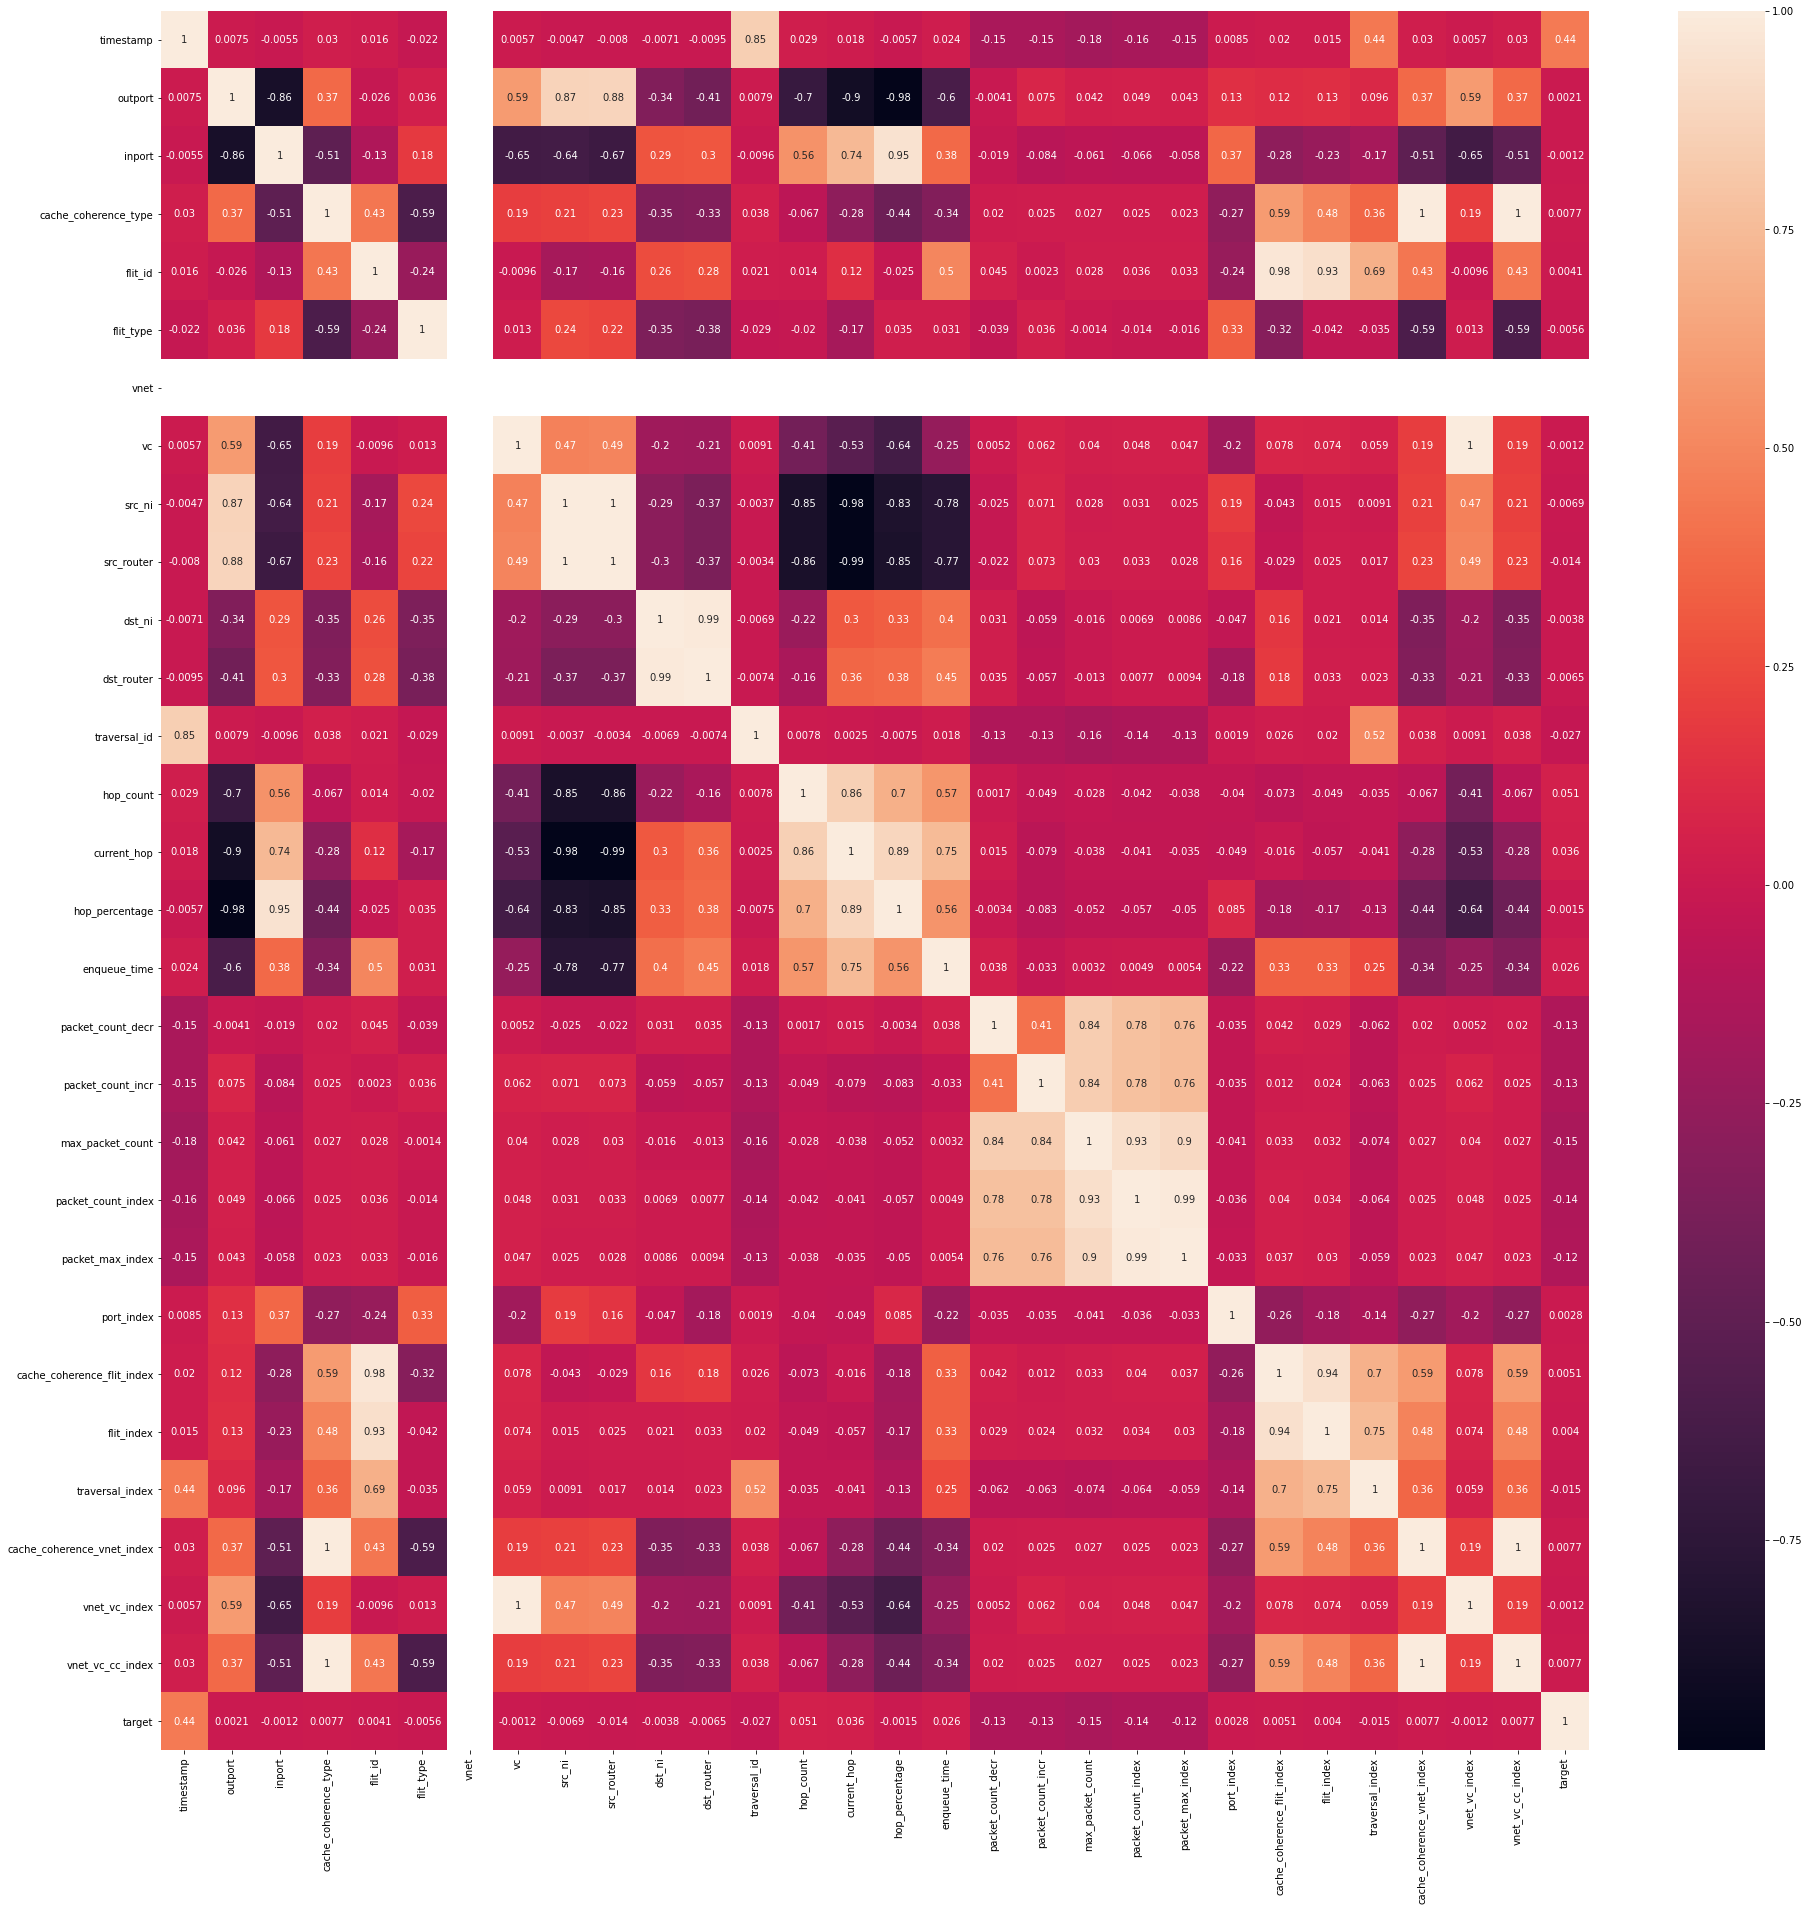

In [340]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [341]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,3,4,3,1,4,3,9,27,11,18,3,2,0.666667,12,1,1,1,1,1,12,3,12,216,9,27,27
1,3,4,3,1,4,3,9,27,11,9,3,2,0.666667,15,1,1,1,1,1,12,3,12,108,9,27,27
2,3,4,3,1,4,3,9,27,11,19,3,2,0.666667,12,1,1,1,1,1,12,3,12,228,9,27,27
3,3,4,3,1,4,3,9,27,11,43,3,2,0.666667,15,1,1,1,1,1,12,3,12,516,9,27,27
4,3,4,3,1,4,3,9,27,11,22,3,2,0.666667,12,1,1,1,1,1,12,3,12,264,9,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9673,4,0,2,1,4,3,12,30,14,9987,1,0,0.000000,32,1,1,1,1,1,0,2,8,79896,6,36,18
9674,4,0,7,1,4,3,9,0,0,9986,6,0,0.000000,6,1,1,1,1,1,0,7,28,279608,21,27,63
9675,0,4,3,1,4,3,9,31,15,9987,1,1,1.000000,8,1,1,1,1,1,0,3,12,119844,9,27,27
9676,3,4,3,1,4,3,9,27,11,9991,3,2,0.666667,12,1,1,1,1,1,12,3,12,119892,9,27,27


In [342]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.0,0.333333,0.0,1.0,0.0,0.0,0.870968,0.733333,0.000814,0.4,0.333333,0.666667,0.145455,0.0,0.0,0.0,0.0,0.0,1.0,0.068966,0.093023,0.000109,0.333333,0.0,0.333333
1,0.75,1.0,0.333333,0.0,1.0,0.0,0.0,0.870968,0.733333,0.000000,0.4,0.333333,0.666667,0.200000,0.0,0.0,0.0,0.0,0.0,1.0,0.068966,0.093023,0.000000,0.333333,0.0,0.333333
2,0.75,1.0,0.333333,0.0,1.0,0.0,0.0,0.870968,0.733333,0.000904,0.4,0.333333,0.666667,0.145455,0.0,0.0,0.0,0.0,0.0,1.0,0.068966,0.093023,0.000121,0.333333,0.0,0.333333
3,0.75,1.0,0.333333,0.0,1.0,0.0,0.0,0.870968,0.733333,0.003075,0.4,0.333333,0.666667,0.200000,0.0,0.0,0.0,0.0,0.0,1.0,0.068966,0.093023,0.000412,0.333333,0.0,0.333333
4,0.75,1.0,0.333333,0.0,1.0,0.0,0.0,0.870968,0.733333,0.001176,0.4,0.333333,0.666667,0.145455,0.0,0.0,0.0,0.0,0.0,1.0,0.068966,0.093023,0.000157,0.333333,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9673,1.00,0.0,0.166667,0.0,1.0,0.0,1.0,0.967742,0.933333,0.902496,0.0,0.000000,0.000000,0.509091,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.080530,0.166667,1.0,0.166667
9674,1.00,0.0,1.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.902406,1.0,0.000000,0.000000,0.036364,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.282098,1.000000,0.0,1.000000
9675,0.00,1.0,0.333333,0.0,1.0,0.0,0.0,1.000000,1.000000,0.902496,0.0,0.166667,1.000000,0.072727,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.120849,0.333333,0.0,0.333333
9676,0.75,1.0,0.333333,0.0,1.0,0.0,0.0,0.870968,0.733333,0.902858,0.4,0.333333,0.666667,0.145455,0.0,0.0,0.0,0.0,0.0,1.0,0.068966,0.093023,0.120897,0.333333,0.0,0.333333


In [343]:
train_X[train_X.duplicated()].shape

(40, 26)

In [344]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.862434,0.374474,-0.026256,0.036182,NaN,0.589802,-0.338311,-0.412580,0.007915,-0.701106,-0.895276,-0.976692,-0.602884,-0.004092,0.075294,0.042440,0.048729,0.042566,0.130634,0.119056,0.127403,0.095694,0.374474,0.589802,0.374474,0.002073
inport,-0.862434,1.000000,-0.507599,-0.131804,0.181634,NaN,-0.647465,0.290224,0.295963,-0.009602,0.555790,0.741727,0.946248,0.376470,-0.018805,-0.083876,-0.061203,-0.065515,-0.058438,0.367313,-0.276700,-0.232205,-0.174235,-0.507599,-0.647465,-0.507599,-0.001246
cache_coherence_type,0.374474,-0.507599,1.000000,0.426489,-0.587729,NaN,0.194007,-0.353140,-0.332533,0.037663,-0.066603,-0.276112,-0.435253,-0.335074,0.019535,0.025485,0.026835,0.024907,0.023147,-0.272129,0.588084,0.479631,0.360962,1.000000,0.194007,1.000000,0.007707
flit_id,-0.026256,-0.131804,0.426489,1.000000,-0.236346,NaN,-0.009616,0.256488,0.276700,0.021047,0.014419,0.123634,-0.025103,0.496119,0.045129,0.002264,0.028249,0.035580,0.032735,-0.237825,0.976041,0.931261,0.694611,0.426489,-0.009616,0.426489,0.004100
flit_type,0.036182,0.181634,-0.587729,-0.236346,1.000000,NaN,0.013252,-0.353457,-0.381310,-0.029003,-0.019871,-0.170376,0.034594,0.030665,-0.038790,0.036472,-0.001382,-0.014485,-0.016451,0.327738,-0.320184,-0.042099,-0.035483,-0.587729,0.013252,-0.587729,-0.005650
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.589802,-0.647465,0.194007,-0.009616,0.013252,NaN,1.000000,-0.199751,-0.210896,0.009111,-0.406409,-0.529889,-0.635041,-0.250660,0.005194,0.061567,0.039793,0.048232,0.047322,-0.195400,0.077904,0.074377,0.058654,0.194007,1.000000,0.194007,-0.001196
dst_ni,-0.338311,0.290224,-0.353140,0.256488,-0.353457,NaN,-0.199751,1.000000,0.989106,-0.006932,-0.222000,0.302664,0.329740,0.398690,0.031355,-0.058981,-0.016467,0.006869,0.008614,-0.047363,0.160537,0.020637,0.014355,-0.353140,-0.199751,-0.353140,-0.003803
dst_router,-0.412580,0.295963,-0.332533,0.276700,-0.381310,NaN,-0.210896,0.989106,1.000000,-0.007448,-0.158023,0.360954,0.376423,0.452926,0.034620,-0.057249,-0.013488,0.007686,0.009390,-0.176482,0.177325,0.032931,0.023450,-0.332533,-0.210896,-0.332533,-0.006537
traversal_id,0.007915,-0.009602,0.037663,0.021047,-0.029003,NaN,0.009111,-0.006932,-0.007448,1.000000,0.007811,0.002462,-0.007542,0.018083,-0.133775,-0.133768,-0.159470,-0.141134,-0.129275,0.001908,0.025815,0.019956,0.517995,0.037663,0.009111,0.037663,-0.027282


Principal Component Analysis

In [345]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[ 0.33752364,  1.03551759, -0.02596   , ..., -0.71091893,
        -0.41705288, -0.45271706],
       [ 0.34732169,  1.02576765, -0.03901113, ..., -0.70514983,
        -0.4198667 , -0.43473881],
       [ 0.33752305,  1.03551296, -0.02596128, ..., -0.71092377,
        -0.41696447, -0.45270907],
       ...,
       [ 0.61321031,  0.85950128, -0.36498721, ..., -0.29827533,
         0.46185357, -0.29476703],
       [ 0.33160168,  0.98934018, -0.03873371, ..., -0.75915394,
         0.46462109, -0.37308799],
       [ 0.34464556,  0.97618283, -0.05617877, ..., -0.75162624,
         0.46387514, -0.34884552]])

In [346]:
pca.explained_variance_ratio_

array([0.4616152 , 0.19341409, 0.09363611, 0.07533548, 0.0685707 ,
       0.03848954, 0.02933992])

Text(0, 0.5, 'Variance')

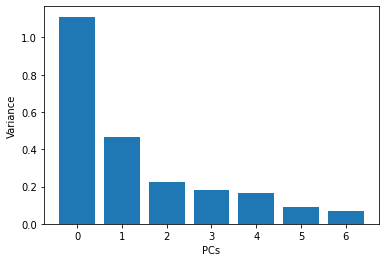

In [347]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [348]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6
0,0.337524,1.035518,-0.025960,-0.148604,-0.710919,-0.417053,-0.452717
1,0.347322,1.025768,-0.039011,-0.132975,-0.705150,-0.419867,-0.434739
2,0.337523,1.035513,-0.025961,-0.148601,-0.710924,-0.416964,-0.452709
3,0.347302,1.025610,-0.039055,-0.132859,-0.705314,-0.416861,-0.434467
4,0.337521,1.035499,-0.025965,-0.148591,-0.710938,-0.416699,-0.452685
...,...,...,...,...,...,...,...
9673,-1.022744,1.036240,-0.602672,0.682738,0.551427,0.430347,0.147373
9674,-0.813634,0.135889,1.388219,0.426331,-0.923989,0.353884,0.449394
9675,0.613210,0.859501,-0.364987,-0.386422,-0.298275,0.461854,-0.294767
9676,0.331602,0.989340,-0.038734,-0.114619,-0.759154,0.464621,-0.373088


In [349]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,target
0,1.000000e+00,2.360281e-16,1.288661e-15,1.308498e-15,2.194417e-16,-4.369071e-17,-6.512112e-16,0.013282
1,2.360281e-16,1.000000e+00,-1.059377e-15,1.424910e-15,5.733053e-16,1.885002e-16,3.506485e-16,-0.015806
2,1.288661e-15,-1.059377e-15,1.000000e+00,-1.064381e-15,-1.092120e-16,-4.326354e-16,3.785767e-17,0.027721
3,1.308498e-15,1.424910e-15,-1.064381e-15,1.000000e+00,3.235870e-16,2.345257e-17,-1.287444e-16,0.027790
4,2.194417e-16,5.733053e-16,-1.092120e-16,3.235870e-16,1.000000e+00,-2.834580e-16,6.612252e-16,0.010521
5,-4.369071e-17,1.885002e-16,-4.326354e-16,2.345257e-17,-2.834580e-16,1.000000e+00,7.575290e-16,-0.022409
6,-6.512112e-16,3.506485e-16,3.785767e-17,-1.287444e-16,6.612252e-16,7.575290e-16,1.000000e+00,0.025307
target,1.328195e-02,-1.580641e-02,2.772095e-02,2.778987e-02,1.052095e-02,-2.240942e-02,2.530688e-02,1.000000


In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

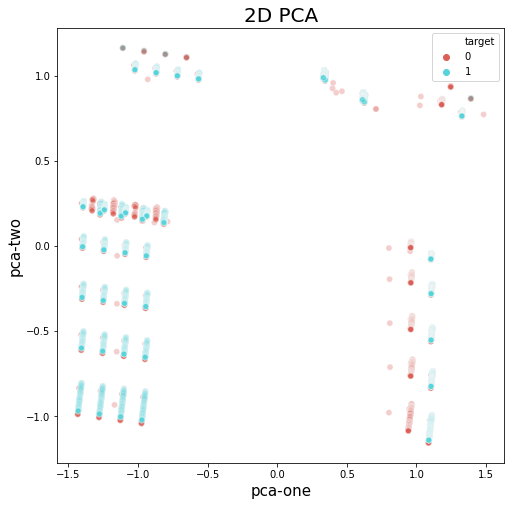

In [351]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

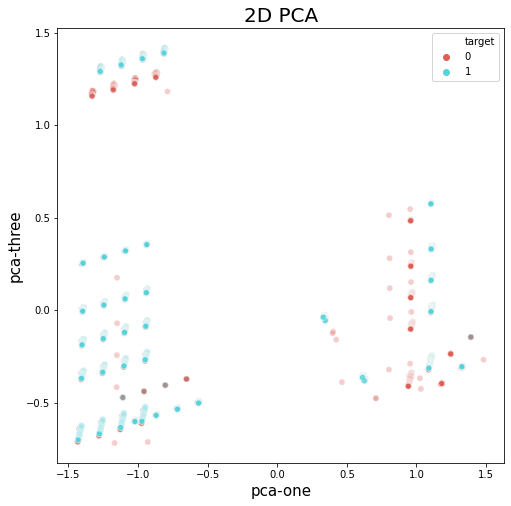

In [352]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

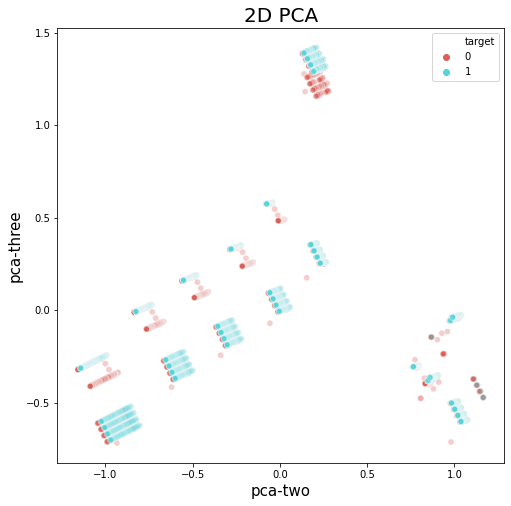

In [353]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

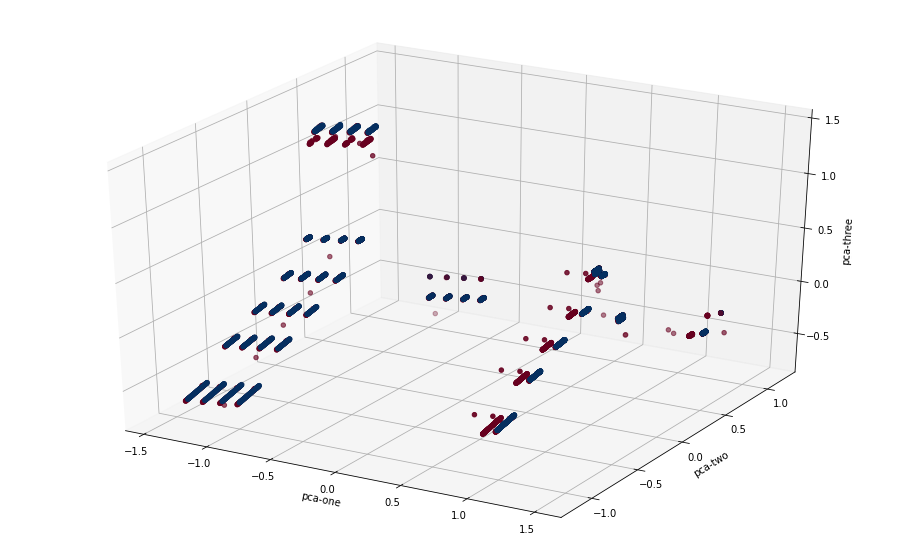

In [354]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

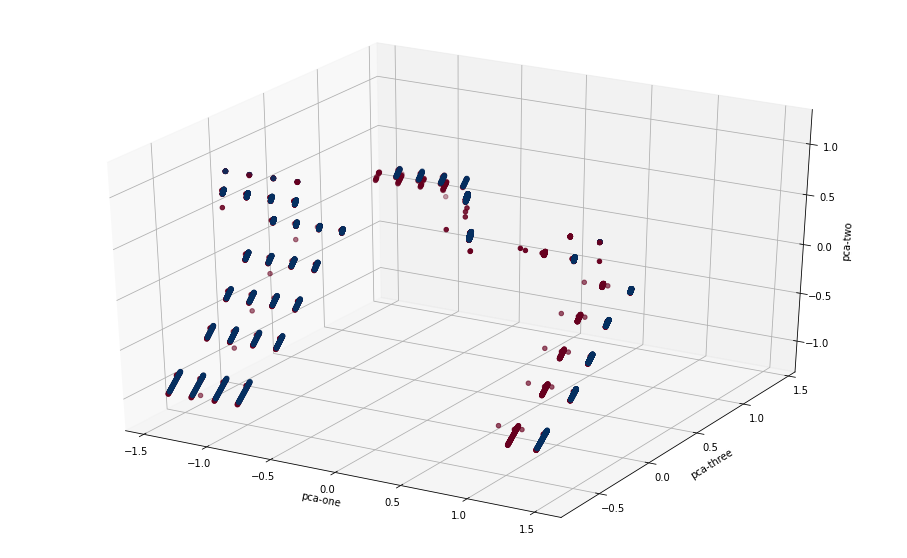

In [355]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

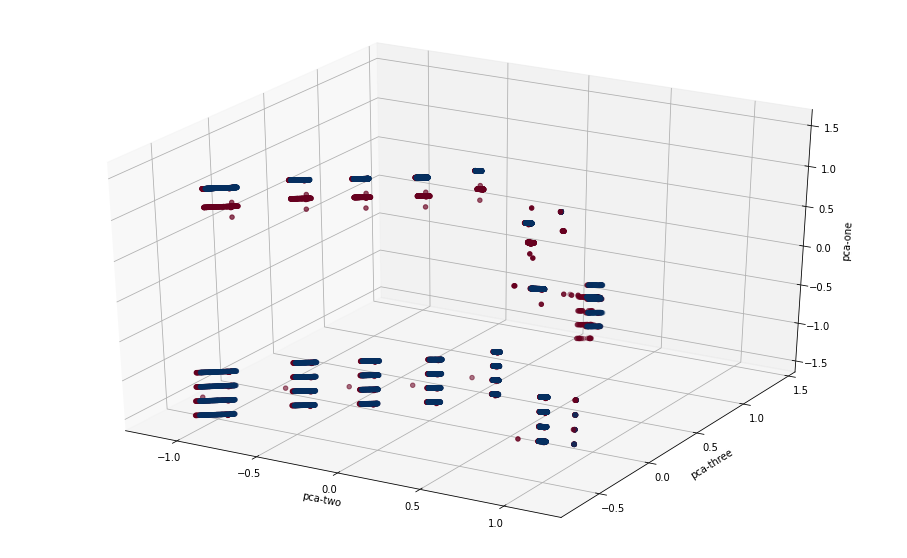

In [356]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [357]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 35.77880644798279 seconds


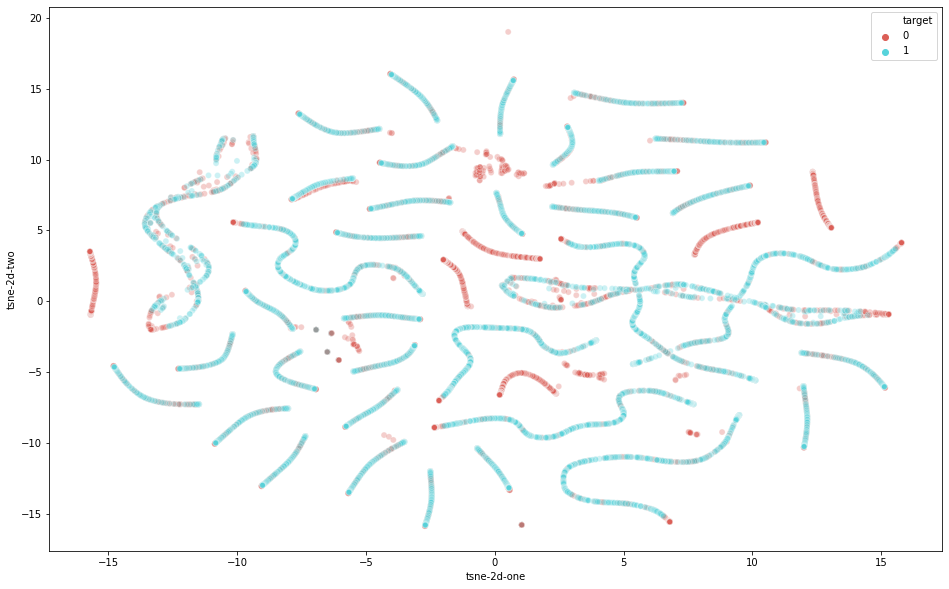

In [358]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

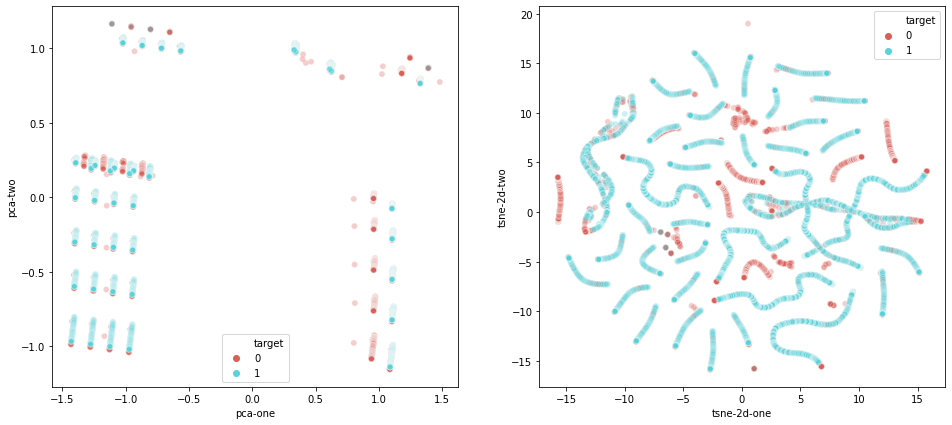

In [359]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [360]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 24.85881209373474 seconds


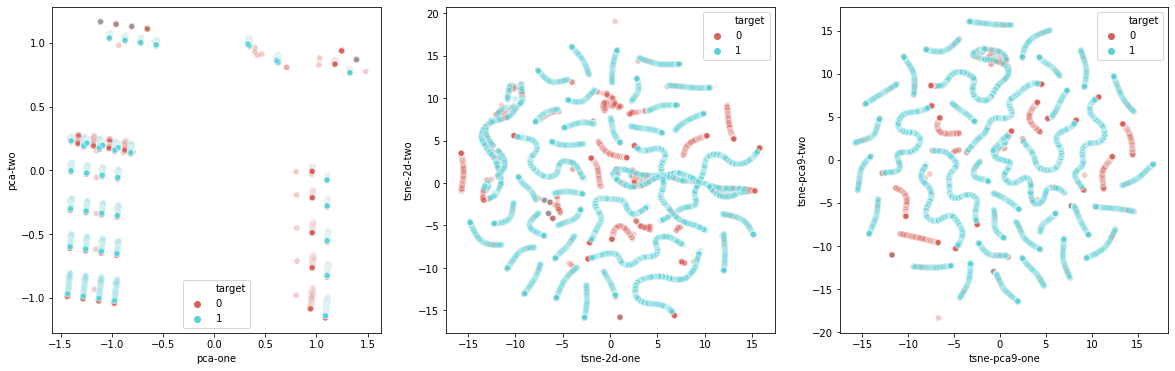

In [361]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [363]:
train_Y = df['target']
train_Y.value_counts()

1    4847
0    4831
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs       Score
16            max_packet_count  131.421528
17          packet_count_index   73.797591
14           packet_count_decr   66.218837
15           packet_count_incr   65.202691
18            packet_max_index   58.112038
10                   hop_count    9.482702
11                 current_hop    5.685305
13                enqueue_time    1.040242
9                 traversal_id    0.622105
22             traversal_index    0.346251
0                      outport    0.085189
12              hop_percentage    0.077203
3                      flit_id    0.068618
1                       inport    0.068498
2         cache_coherence_type    0.048671
23  cache_coherence_vnet_index    0.048671
25            vnet_vc_cc_index    0.048671


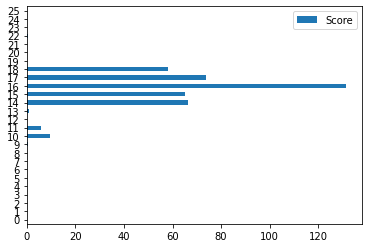

In [366]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [369]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [370]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 63.820718160682
Test Prediction  63.99793388429752


In [371]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
1,inport,25.486487
10,hop_count,11.400613
0,outport,10.112965
7,dst_ni,8.507181
8,dst_router,4.692492
4,flit_type,1.727100
20,cache_coherence_flit_index,1.189597
25,vnet_vc_cc_index,0.585530
23,cache_coherence_vnet_index,0.585530
2,cache_coherence_type,0.585530


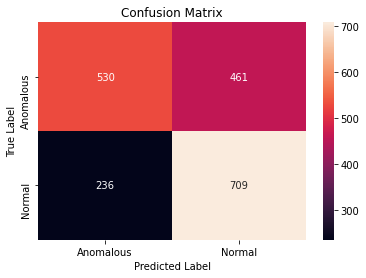

In [372]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [373]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60       991
           1       0.61      0.75      0.67       945

    accuracy                           0.64      1936
   macro avg       0.65      0.64      0.64      1936
weighted avg       0.65      0.64      0.64      1936



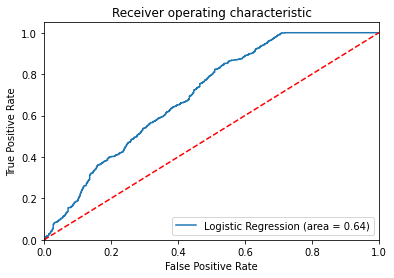

In [374]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [375]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [377]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 76.56936192198398
Test Prediction  63.27479338842975


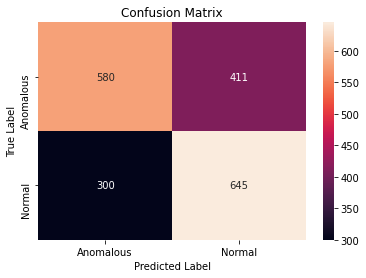

In [378]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [379]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.66      0.59      0.62       991
           1       0.61      0.68      0.64       945

    accuracy                           0.63      1936
   macro avg       0.63      0.63      0.63      1936
weighted avg       0.64      0.63      0.63      1936



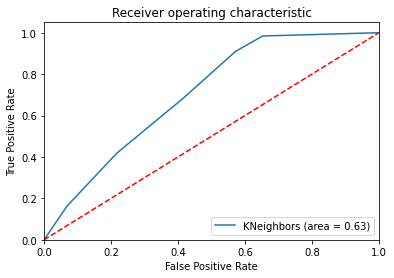

In [380]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [382]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [384]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 53.0741410488246
Test Prediction Score 51.08471074380165


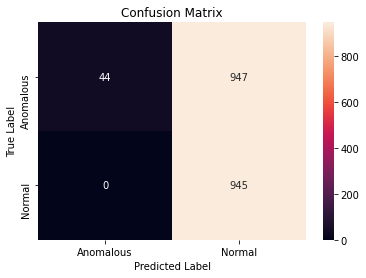

In [385]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [386]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.04      0.09       991
           1       0.50      1.00      0.67       945

    accuracy                           0.51      1936
   macro avg       0.75      0.52      0.38      1936
weighted avg       0.76      0.51      0.37      1936



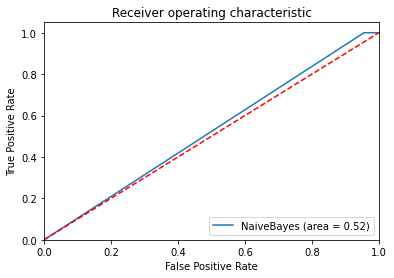

In [387]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [389]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 6193 samples, validate on 1549 samples
Epoch 1/10
6193/6193 [==============================] - 0s 50us/step - loss: 0.2536 - accuracy: 0.5022 - val_loss: 0.2516 - val_accuracy: 0.4977
Epoch 2/10
6193/6193 [==============================] - 0s 36us/step - loss: 0.2514 - accuracy: 0.4933 - val_loss: 0.2504 - val_accuracy: 0.4964
Epoch 3/10
6193/6193 [==============================] - 0s 41us/step - loss: 0.2504 - accuracy: 0.5022 - val_loss: 0.2497 - val_accuracy: 0.5042
Epoch 4/10
6193/6193 [==============================] - 0s 38us/step - loss: 0.2498 - accuracy: 0.5128 - val_loss: 0.2493 - val_accuracy: 0.5119
Epoch 5/10
6193/6193 [==============================] - 0s 37us/step - loss: 0.2495 - accuracy: 0.5132 - val_loss: 0.2489 - val_accuracy: 0.5152
Epoch 6/10
6193/6193 [==============================] - 0s 37us/step - loss: 0.2491 - accuracy: 0.5211 - val_loss: 0.2485 - val_accuracy: 0.5184
Epoch 7/10
6193/6193 [==============================] - 0s 37us/step - loss: 0.248

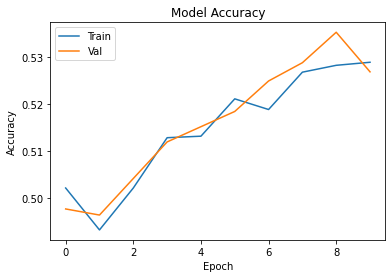

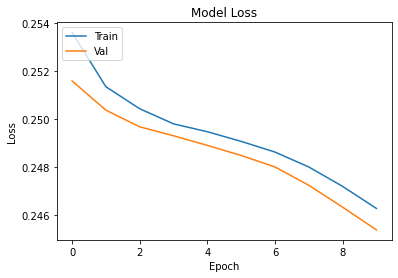

In [390]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [391]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 53.05%


3-Layer Neural Network

In [392]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 6193 samples, validate on 1549 samples
Epoch 1/15
6193/6193 [==============================] - 0s 46us/step - loss: 0.2500 - accuracy: 0.4999 - val_loss: 0.2500 - val_accuracy: 0.5074
Epoch 2/15
6193/6193 [==============================] - 0s 37us/step - loss: 0.2500 - accuracy: 0.4948 - val_loss: 0.2500 - val_accuracy: 0.5074
Epoch 3/15
6193/6193 [==============================] - 0s 41us/step - loss: 0.2500 - accuracy: 0.5031 - val_loss: 0.2500 - val_accuracy: 0.5074
Epoch 4/15
6193/6193 [==============================] - 0s 40us/step - loss: 0.2500 - accuracy: 0.5031 - val_loss: 0.2500 - val_accuracy: 0.5074
Epoch 5/15
6193/6193 [==============================] - 0s 36us/step - loss: 0.2500 - accuracy: 0.5031 - val_loss: 0.2500 - val_accuracy: 0.5074
Epoch 6/15
6193/6193 [==============================] - 0s 41us/step - loss: 0.2500 - accuracy: 0.5031 - val_loss: 0.2500 - val_accuracy: 0.5074
Epoch 7/15
6193/6193 [==============================] - 0s 37us/step - loss: 0.250

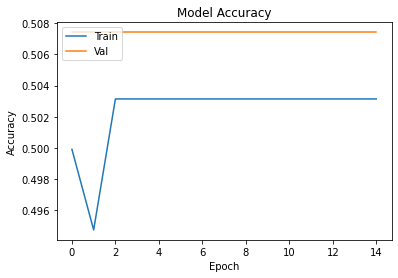

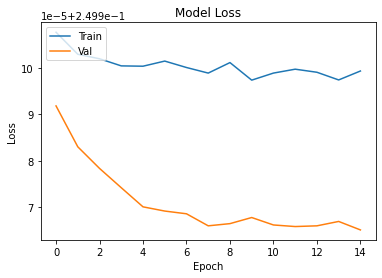

In [393]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [394]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 48.81%


4-Layer Neural Network



In [395]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 6193 samples, validate on 1549 samples
Epoch 1/30
6193/6193 [==============================] - 0s 46us/step - loss: 0.2501 - accuracy: 0.4970 - val_loss: 0.2501 - val_accuracy: 0.4874
Epoch 2/30
6193/6193 [==============================] - 0s 37us/step - loss: 0.2501 - accuracy: 0.4965 - val_loss: 0.2501 - val_accuracy: 0.4861
Epoch 3/30
6193/6193 [==============================] - 0s 38us/step - loss: 0.2501 - accuracy: 0.4993 - val_loss: 0.2501 - val_accuracy: 0.4919
Epoch 4/30
6193/6193 [==============================] - 0s 37us/step - loss: 0.2500 - accuracy: 0.5019 - val_loss: 0.2500 - val_accuracy: 0.4906
Epoch 5/30
6193/6193 [==============================] - 0s 37us/step - loss: 0.2500 - accuracy: 0.5027 - val_loss: 0.2500 - val_accuracy: 0.4919
Epoch 6/30
6193/6193 [==============================] - 0s 38us/step - loss: 0.2500 - accuracy: 0.4991 - val_loss: 0.2501 - val_accuracy: 0.4919
Epoch 7/30
6193/6193 [==============================] - 0s 42us/step - loss: 0.250

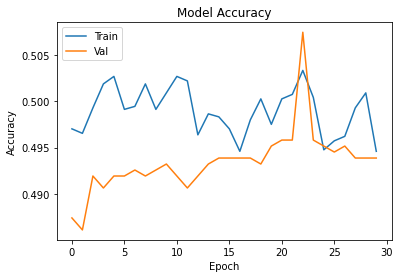

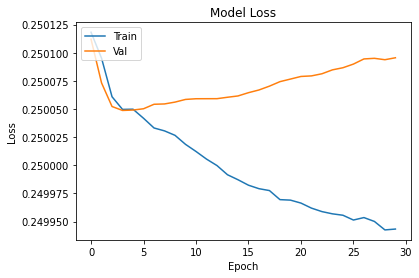

In [396]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [397]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 51.19%


5-Layer Neural Network Optimized

In [398]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 6193 samples, validate on 1549 samples
Epoch 1/100
6193/6193 [==============================] - 1s 165us/step - loss: 0.2479 - accuracy: 0.5262 - val_loss: 0.2497 - val_accuracy: 0.5216
Epoch 2/100
6193/6193 [==============================] - 0s 70us/step - loss: 0.2305 - accuracy: 0.5866 - val_loss: 0.2302 - val_accuracy: 0.5203
Epoch 3/100
6193/6193 [==============================] - 0s 71us/step - loss: 0.2193 - accuracy: 0.6133 - val_loss: 0.2530 - val_accuracy: 0.5384
Epoch 4/100
6193/6193 [==============================] - 0s 77us/step - loss: 0.2166 - accuracy: 0.6068 - val_loss: 0.2133 - val_accuracy: 0.5972
Epoch 5/100
6193/6193 [==============================] - 0s 68us/step - loss: 0.2140 - accuracy: 0.6181 - val_loss: 0.2136 - val_accuracy: 0.6204
Epoch 6/100
6193/6193 [==============================] - 0s 69us/step - loss: 0.2106 - accuracy: 0.6335 - val_loss: 0.2071 - val_accuracy: 0.6391
Epoch 7/100
6193/6193 [==============================] - 0s 74us/step - los

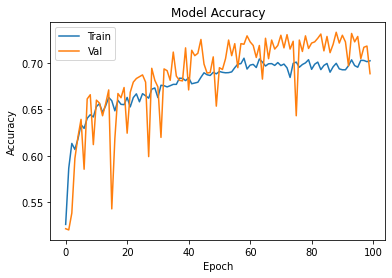

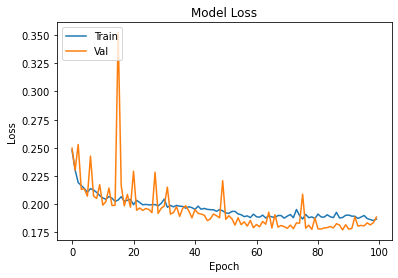

In [399]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [400]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 67.36%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [402]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.8155540838586891


In [403]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [405]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 96.24128132265565
Test Prediction Score 88.53305785123968


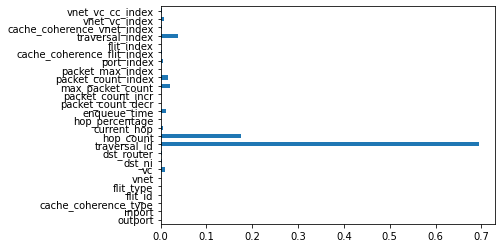

In [406]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

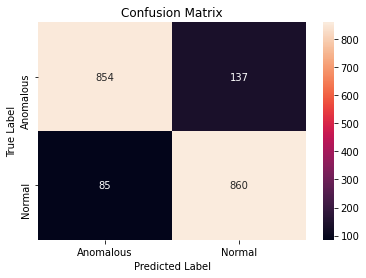

In [407]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [408]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       991
           1       0.86      0.91      0.89       945

    accuracy                           0.89      1936
   macro avg       0.89      0.89      0.89      1936
weighted avg       0.89      0.89      0.89      1936



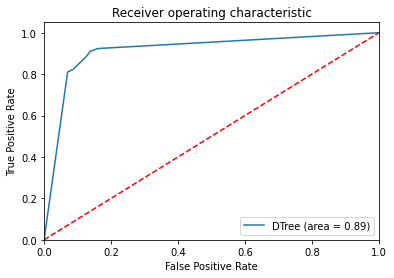

In [409]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250],
#            'max_features':range(0,25,2)}
#dt_g=RandomForestClassifier(random_state=42)
#dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
#dt_cv.fit(X_train,y_train)

#print("Best parameters:",dt_cv.best_params_)
#print("Accuracy :",dt_cv.best_score_)

In [412]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [414]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.57375355205373
Test Prediction Score 84.29752066115702


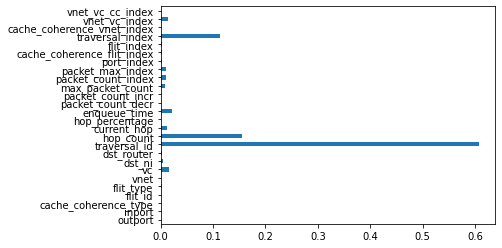

In [415]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

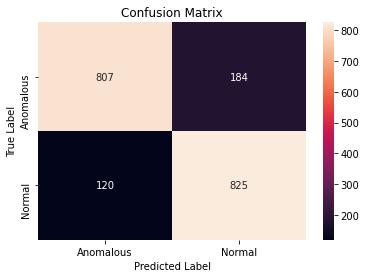

In [416]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [417]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       991
           1       0.82      0.87      0.84       945

    accuracy                           0.84      1936
   macro avg       0.84      0.84      0.84      1936
weighted avg       0.84      0.84      0.84      1936



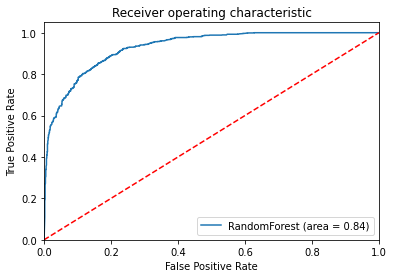

In [418]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250,500],
#           'min_child_weight':[1,3,6]}
#xgb_g=XGBClassifier(random_state=42)
#xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
#xgb_cv.fit(X_train,y_train)

#print("Best parameters:",xgb_cv.best_params_)
#print("Accuracy :",xgb_cv.best_score_)

In [421]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [423]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.53500387496771
Test Prediction Score 93.28512396694215


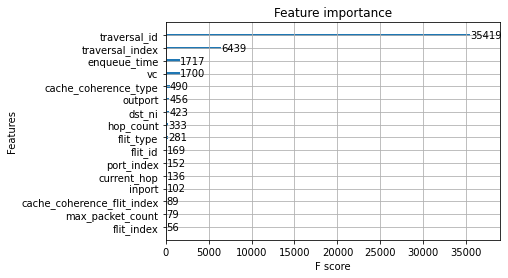

In [424]:
plot_importance(xgbc)
plt.show()

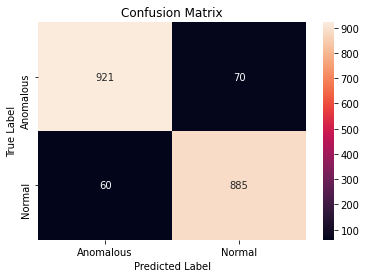

In [425]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [426]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       991
           1       0.93      0.94      0.93       945

    accuracy                           0.93      1936
   macro avg       0.93      0.93      0.93      1936
weighted avg       0.93      0.93      0.93      1936



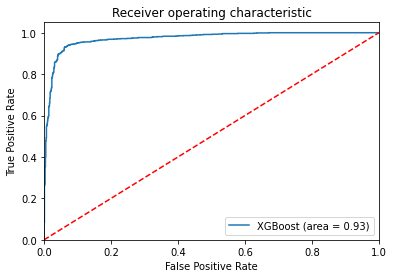

In [427]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
#param_grid = {'n_estimators': [x for x in range(24,40,2)],
#              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
#lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
#lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
#lgb_cv.fit(X_train, y_train)

#print("Best parameters:",lgb_cv.best_params_)
#print("Accuracy :",lgb_cv.best_score_)

In [430]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [432]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 89.05967450271248
Test Prediction Score 67.76859504132231


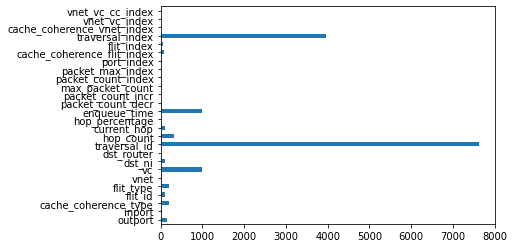

In [433]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

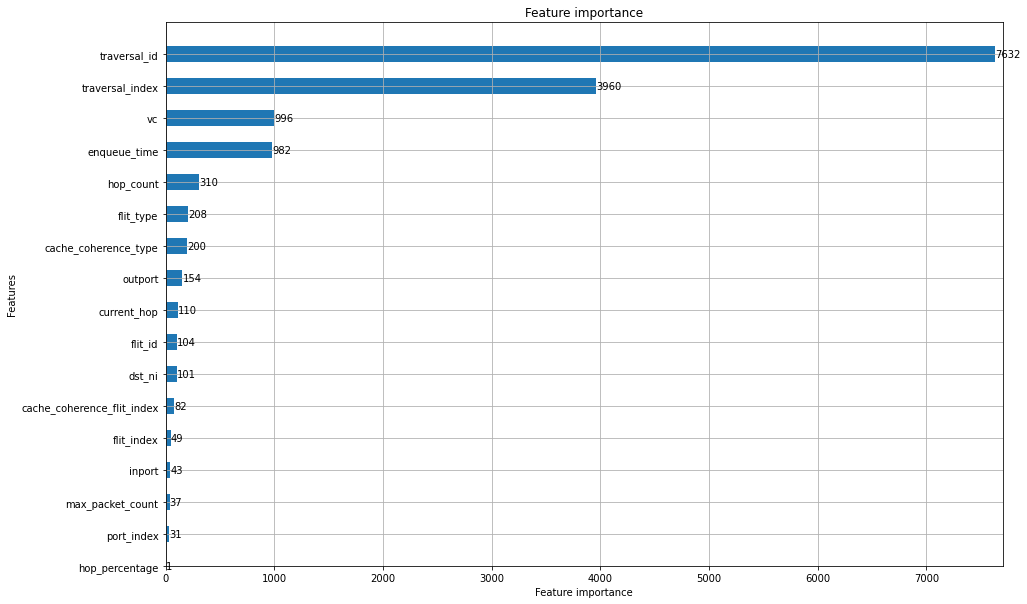

In [439]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,7700), ylim = (0,17), figsize = (15,10))
plt.show()

In [435]:
sorted(gbm.feature_importances_,reverse=True)

[7632,
 3960,
 996,
 982,
 310,
 208,
 200,
 154,
 110,
 104,
 101,
 82,
 49,
 43,
 37,
 31,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

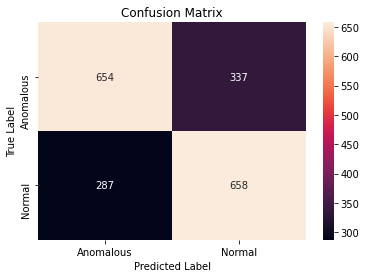

In [436]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [437]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       991
           1       0.66      0.70      0.68       945

    accuracy                           0.68      1936
   macro avg       0.68      0.68      0.68      1936
weighted avg       0.68      0.68      0.68      1936



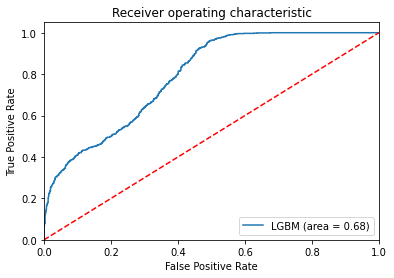

In [438]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()